In [1]:
from common_def import show_image, play_video, show_full_path

play_video("./assets/videos/2.mp4")

Absolute path: c:\Users\sAI\Desktop\AI_ML_Roadmap\LinearAlgebra\Notes\assets\videos\2.mp4


In [11]:
# Jupyter Notebook to understand fitting functions to data and the use of vectors in optimization

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.image as mpimg
from scipy.optimize import minimize



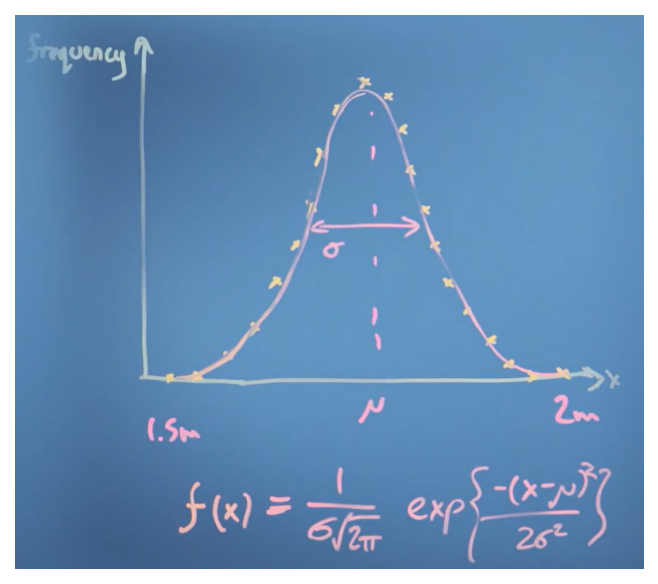

In [2]:
image_path = './assets/images/gaussianDistributionFormula.png'

show_image(image_path, 150)

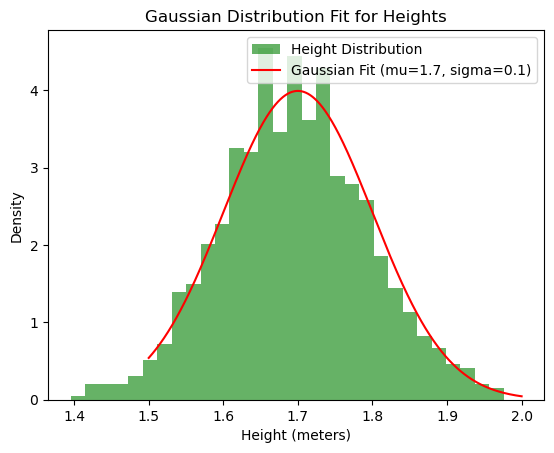

In [19]:
# 1. Understanding the Gaussian Distribution (Normal Distribution)
# This function will represent the Gaussian distribution formula given in the video.

def gaussian_distribution(x, mu, sigma):
    """Calculate the Gaussian (normal) distribution for given mu and sigma"""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# 2. Example Data - Heights in the Population (Simulating Data)
# For simplicity, we will create some synthetic data that resembles a height distribution.
np.random.seed(0)
heights = np.random.normal(loc=1.7, scale=0.1, size=1000)  # mu=1.7, sigma=0.1

# Plot the histogram of the simulated data (heights)
plt.hist(heights, bins=30, density=True, alpha=0.6, color='g', label="Height Distribution")

# Adding a Gaussian curve fit
x_vals = np.linspace(1.5, 2.0, 1000)
mu, sigma = 1.7, 0.1  # Best guess for mean (mu) and standard deviation (sigma)
y_vals = gaussian_distribution(x_vals, mu, sigma)

plt.plot(x_vals, y_vals, color='red', label="Gaussian Fit (mu=1.7, sigma=0.1)")
plt.title("Gaussian Distribution Fit for Heights")
plt.xlabel("Height (meters)")
plt.ylabel("Density")
plt.legend()
plt.show()



Optimal mu (mean): 1.69
Optimal sigma (standard deviation): 0.10


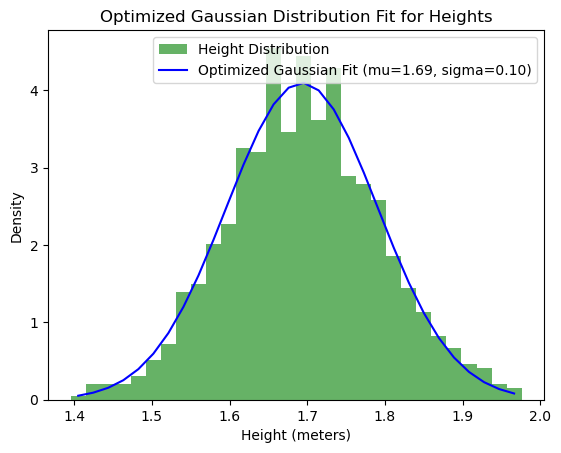

In [20]:
# 3. Optimization Problem: Fitting Parameters (mu and sigma)
# Now, let's fit the Gaussian distribution to the data by optimizing mu and sigma.

# Define the function to calculate the sum of squared errors between the observed data and the Gaussian distribution
def sum_of_squared_errors(params, data, bins=30):
    """Calculate the sum of squared differences between data and Gaussian distribution for given mu and sigma."""
    mu, sigma = params[0], params[1]
    
    # Compute histogram (data distribution)
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centers of bins for comparison
    
    # Get the Gaussian distribution values at the bin centers
    y_fit = gaussian_distribution(bin_centers, mu, sigma)
    
    # Calculate the sum of squared errors
    return np.sum((counts - y_fit)**2)

# Use optimization to find the best fitting mu and sigma
initial_guess = [1.7, 0.1]  # Initial guess for mu and sigma
result = minimize(sum_of_squared_errors, initial_guess, args=(heights,))
optimal_mu, optimal_sigma = result.x

# Print the optimal values for mu and sigma
print(f"Optimal mu (mean): {optimal_mu:.2f}")
print(f"Optimal sigma (standard deviation): {optimal_sigma:.2f}")

# Plot the optimized Gaussian fit
# Get the bin centers from the last computation of np.histogram
counts, bin_edges = np.histogram(heights, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centers of bins for comparison

y_fit_optimal = gaussian_distribution(bin_centers, optimal_mu, optimal_sigma)

plt.hist(heights, bins=30, density=True, alpha=0.6, color='g', label="Height Distribution")
plt.plot(bin_centers, y_fit_optimal, color='blue', label=f"Optimized Gaussian Fit (mu={optimal_mu:.2f}, sigma={optimal_sigma:.2f})")
plt.title("Optimized Gaussian Distribution Fit for Heights")
plt.xlabel("Height (meters)")
plt.ylabel("Density")
plt.legend()
plt.show()